In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Arbitrary Value Imputation for Missing Values
1.Replacing the NAN values with an arbitrary value

In [2]:
df = pd.read_csv('./CSV Files/titanic_train.csv', usecols=['age', 'fare', 'survived'])

In [3]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [4]:
df.fare.value_counts().index[0]

13.0

In [5]:
df.fare.fillna(df.fare.value_counts().index[0], inplace=True)

In [6]:
df.isnull().sum()

age         174
fare          0
survived      0
dtype: int64

In [7]:
def impute_nan(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred'] = df[variable].fillna(100)

In [8]:
impute_nan(df, 'age')

In [9]:
df.head()

,age,fare,survived,age_zero,age_hundred
0,NaN,7.7333,1,0.0,100.0
1,38.0,8.6625,0,38.0,38.0
2,30.0,24.1500,0,30.0,30.0
3,54.0,23.0000,1,54.0,54.0
4,40.0,13.0000,0,40.0,40.0


## Observation

### Cons: 
1.Distorts the original distribution of variable

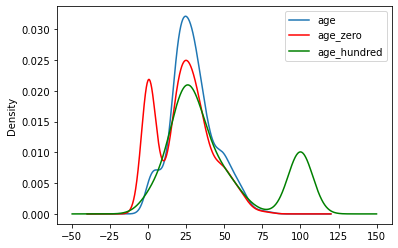

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.age.plot(kind='kde', ax=ax)
df.age_zero.plot(kind='kde', ax=ax, color='red')
df.age_hundred.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Handling Categorical Missing Values

### Frequent Category Imputation


In [11]:
df = pd.read_csv('./CSV Files/house_prediction_train.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [12]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [13]:
df.head(4)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000


In [14]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [15]:
df.nunique()

BsmtQual         4
FireplaceQu      5
GarageType       6
SalePrice      663
dtype: int64

In [16]:
df.shape

(1460, 4)

In [17]:
## Percentage of NAN values

df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:>

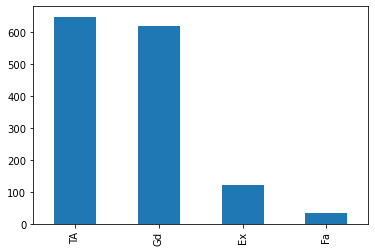

In [18]:
df.BsmtQual.value_counts().plot.bar()

<AxesSubplot:>

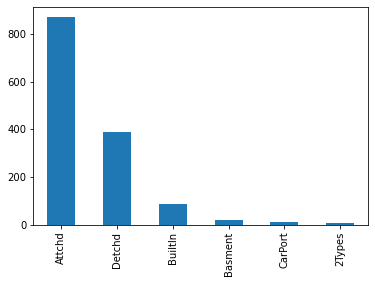

In [19]:
df.GarageType.value_counts().plot(kind='bar')

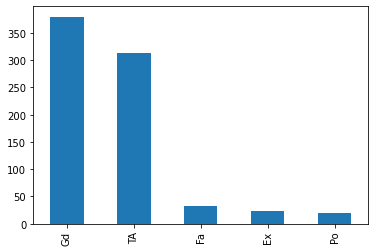

In [20]:
df.FireplaceQu.value_counts().plot.bar()
plt.show()

In [21]:
df.FireplaceQu.value_counts().values[0]

380

### Replacing the NAN values of BsmtQual and GarageType with Frequent Category

In [22]:
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace=True)    

In [23]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

In [24]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [25]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

## Advantage:
1. Easy to Implement

## Disadvantage:
1. Since we are using the more frequent labels, it may use them in an over represented way, if there are many NAN
2. Distorts the relation of the most frequent label

## Adding a variable to capture NAN

In [26]:
df = pd.read_csv('./CSV Files/house_prediction_train.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [27]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [28]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(), 1, 0)

In [29]:
df.head(4)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0


In [32]:
frequent = df.BsmtQual.mode()[0]

In [33]:
df.BsmtQual.fillna(frequent, inplace=True)

In [34]:
df.BsmtQual.isnull().sum()

0

<AxesSubplot:>

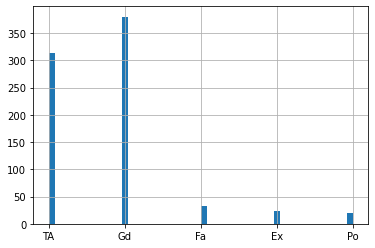

In [35]:
df.FireplaceQu.hist(bins=50)

In [36]:
frequent_fireplace = df.FireplaceQu.mode()[0]

In [37]:
frequent_fireplace

'Gd'

In [38]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(), 1, 0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,NaN,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [39]:
df.FireplaceQu.fillna(frequent_fireplace, inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


<AxesSubplot:>

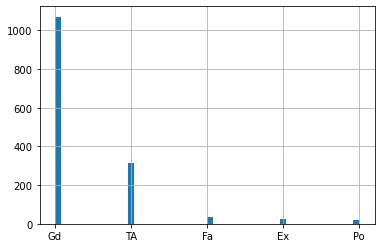

In [40]:
df.FireplaceQu.hist(bins=50)

<AxesSubplot:>

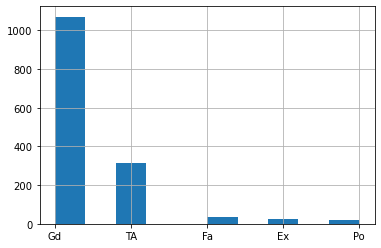

In [47]:
df.FireplaceQu.hist()

### Suppose if you have more frequent categories, we just replace NAN with a new category

In [48]:
df = pd.read_csv('./CSV Files/house_prediction_train.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [49]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [50]:
def impute_nan(df, variable):
    df[variable+'_new_var'] = np.where(df[variable].isnull(), "Missing", df[variable])

In [51]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

In [52]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new_var,FireplaceQu_new_var,GarageType_new_var
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [53]:
df.isnull().sum()

BsmtQual                37
FireplaceQu            690
GarageType              81
SalePrice                0
BsmtQual_new_var         0
FireplaceQu_new_var      0
GarageType_new_var       0
dtype: int64

In [54]:
df.drop(['BsmtQual', 'FireplaceQu', 'GarageType'], axis=1, inplace=True)

In [55]:
df.head(4)

,SalePrice,BsmtQual_new_var,FireplaceQu_new_var,GarageType_new_var
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd


<AxesSubplot:>

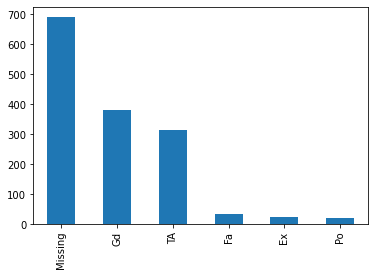

In [58]:
df.FireplaceQu_new_var.value_counts().plot.bar()